### **Prétraitement des Données :**

<!-- <code></code> -->

#### **1. Gestion des Valeurs Manquantes :**

La gestion des valeurs manquantes est une étape essentielle de l’analyse de données (EDA – Exploratory Data Analysis) et du prétraitement avant de faire du Machine Learning ou de la visualisation.

Il existe plusieurs approches, en fonction du type de données et de l’importance de la colonne :

- **Suppression des valeurs manquantes :**

    - Supprimer les lignes qui contiennent des valeurs manquantes (<code>dropna()</code> en <code>Pandas</code>).

    - Supprimer les colonnes entières si elles contiennent trop de valeurs manquantes (Utile quand le dataset est assez grand et que la perte d’informations est négligeable).

- **Imputation (Remplacement) :**

    - Remplacer les valeurs manquantes par une valeur calculée ou choisie.

    - C’est la méthode la plus utilisée car elle permet de conserver toutes les lignes.

- **Méthodes avancées :**

    - Utiliser des modèles statistiques ou de Machine Learning pour prédire les valeurs manquantes (ex : <code>KNN</code> imputer, <code>régression</code>, <code>arbres de décision</code>).

<br>

##### **1.1. Imputation :**

L’imputation consiste à remplacer les valeurs manquantes par une estimation appropriée. Au lieu de supprimer les données, on **devine** la valeur manquante à partir des autres données disponibles. Cette méthode a pour objectif de :

- Conserver un maximum de données : Évite de perdre des observations importantes.

- Les modèles de Machine Learning ne peuvent pas travailler avec des valeurs manquantes (<code>NaN</code>).

- Améliorer la qualité des résultats : Une bonne imputation réduit les biais et donne de meilleures prédictions.

<br>

**A. Imputation Pour les variables numériques :**

Souvent pour les variables numériques manquantes, on les remplace par la <code>moyenne</code>, <code>médiane</code>, ou <code>mode</code>.

En Pandas, il existe plusieurs façons de vérifier la présence de valeurs manquantes (<code>NaN</code>).

_**Remarque :**_ Pour notre Dataset , on a aucune variable numérique manquantes.

In [ ]:
import pandas as pd

data = pd.read_csv("../data/raw/data.csv")

data.isnull() # Retourne un DataFrame de même taille que data, avec des booléens indiquant la présence de NaN.

data.isnull().sum() # Affiche le nombre de valeurs manquantes pour chaque colonne.

data.isnull().sum().sum() # Donne le nombre total de cellules manquantes dans ton dataset.

data.isnull().values.any() # Retourne True s’il existe au moins une valeur manquante dans tout le DataFrame.

data[data.isnull().any(axis=1)] # Affiche toutes les lignes qui contiennent au moins un NaN.

Pour remplacer les valeurs manquantes d’une variable numérique par la médiane, on utilise <code>fillna()</code> de Pandas.

In [ ]:
import pandas as pd

data = pd.read_csv("../data/raw/data.csv")

data_copy = data.copy() 

numeric_cols = data_copy.select_dtypes(include=['number']).columns.tolist()

for col in numeric_cols:
    median_value = data_copy[col].median()
    data_copy[col].fillna(median_value, inplace=True)

**B. Imputation Pour les variables catégorielles :**

Les variables qualitatives (catégorielles) se gèrent un peu différemment des numériques, parce qu’elles ne peuvent pas être remplacées par une moyenne ou une médiane.

Souvent, on les remplace par le <code>mode</code> (valeur la plus fréquente).

_**Remarque :**_ Pour notre Dataset , on a aucune variable catégorielle manquante.

In [ ]:
import pandas as pd

data = pd.read_csv("../data/raw/data.csv")

data_copy = data.copy() 

category_cols = data_copy.select_dtypes(include=['object']).columns.tolist()

for col in category_cols:
    mode_value = data_copy[col].mode()[0]
    data_copy[col].fillna(mode_value, inplace=True)

<br>

#### **2. Gestion des Doublons :**

Les doublons (données répétées) sont fréquents dans un dataset, surtout quand il vient de bases de données, d’Excel ou d’une collecte multiple. Ils peuvent fausser les statistiques et les modèles, donc il faut les gérer.

En Pandas, il existe plusieurs façons de vérifier la présence des doublons.

In [ ]:
import pandas as pd

data = pd.read_csv("../data/raw/data.csv")

data.duplicated() # Retourne une Series de booléens indiquant si une ligne est un doublon d’une ligne précédente.

data.duplicated().sum() # Affiche le nombre de lignes dupliquées dans le DataFrame.

data.duplicated().values.any() # Retourne True s’il existe au moins une ligne dupliquée dans tout le DataFrame.

data[data.duplicated()] # Affiche toutes les lignes qui sont des doublons.

Souvent, on supprime les doublons qu'on a dans notre DataFrame.

En Pandas, on utilise la méthode <code>drop_duplicates()</code>.

In [33]:
import pandas as pd

data = pd.read_csv("../data/raw/data.csv")

data_copy = data.copy()

data_copy = data_copy.drop_duplicates() # Supprimer les doublons (en gardant la 1ère occurrence par défaut)

<br>

#### **3. Détection et Traitement des Outliers :**

Un <code>outlier</code> (ou valeur aberrante) est une observation qui s’écarte fortement des autres données d’un jeu de données. Il peut être beaucoup plus grand ou beaucoup plus petit que la majorité des valeurs et peut indiquer soit une erreur de saisie ou de mesure, soit un phénomène rare ou intéressant à analyser. Les outliers sont importants car ils peuvent fausser les statistiques comme la moyenne ou l’écart-type et affecter les modèles analytiques.

##### **3.1. Boxplot :**

Un <code>Boxplot</code>, ou diagramme en boîte, est un graphique qui permet de visualiser la distribution d’une variable numérique et d’identifier rapidement ses caractéristiques principales, comme la <code>médiane</code>, les <code>quartiles</code> et les valeurs extrêmes (<code>outliers</code>).

La boîte représente l’écart entre le premier quartile (<code>Q1</code> , 25%) et le troisième quartile (<code>Q3</code> , 75%), tandis que la ligne centrale indique la médiane (<code>Q2</code>).

Les moustaches montrent l’étendue des données sans les outliers, généralement jusqu’à <code>1,5 fois</code> l’écart interquartile, et les points situés en dehors de ces moustaches correspondent aux outliers. 

Ce graphique est utile pour observer la symétrie ou l’asymétrie d’une distribution, détecter des valeurs aberrantes et comparer plusieurs distributions côte à côte.

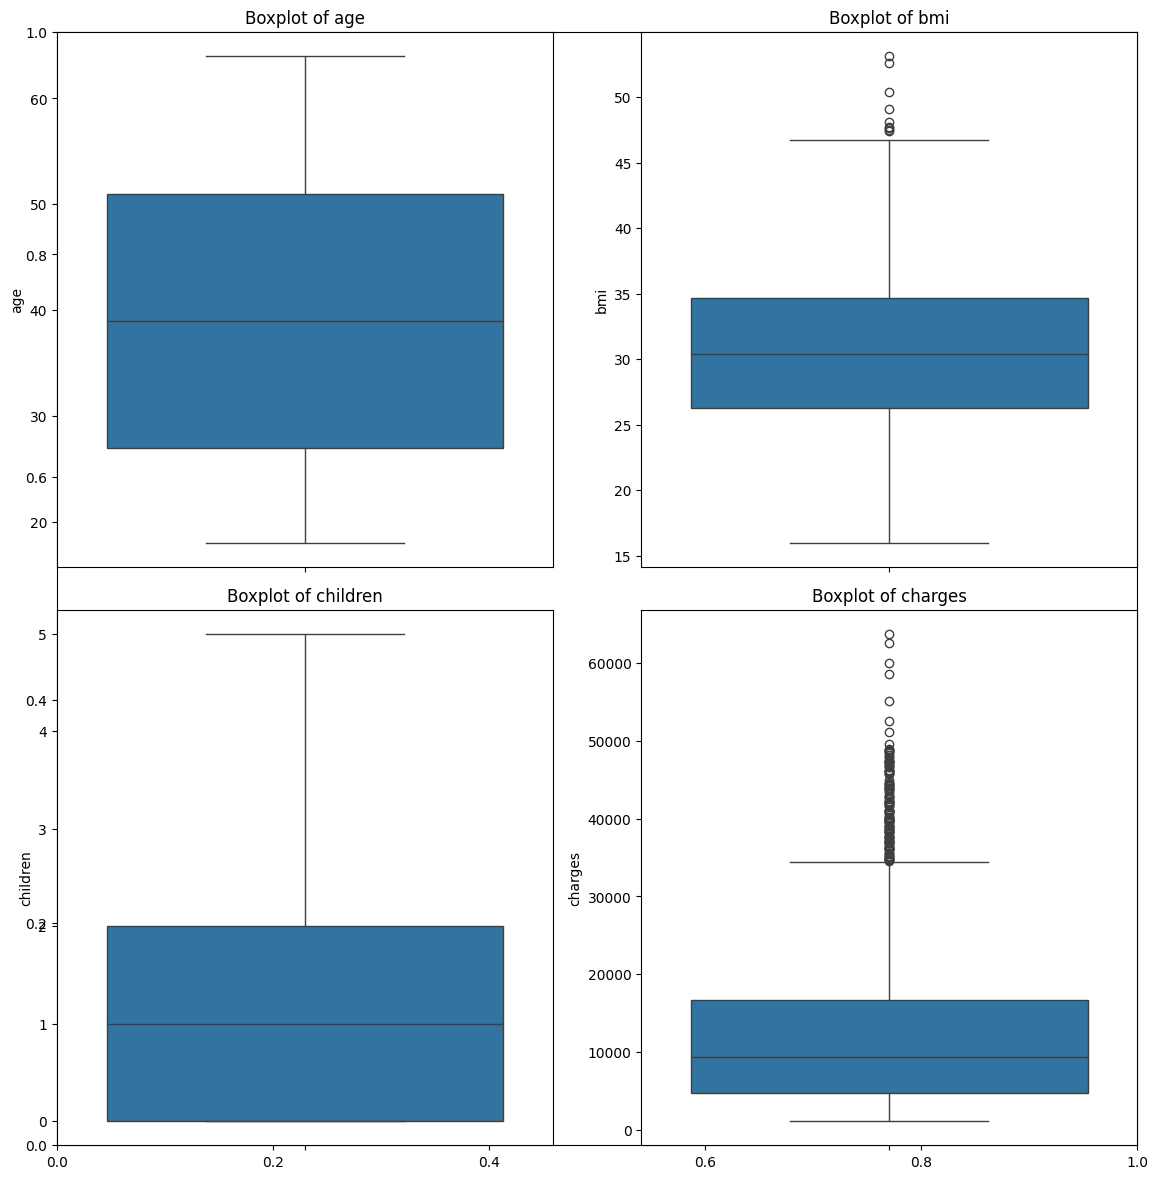

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv("../data/raw/data.csv")

numeric_cols = data.select_dtypes(include=['number']).columns.tolist()

plt.subplots(figsize=(12, 12))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

##### **3.2. IQR (Interquartile Range):**

La méthode <code>IQR</code> est une technique couramment utilisée pour détecter les outliers dans un jeu de données. Elle repose sur les quartiles de la distribution.

- **Définition de l’IQR :** 

L’IQR est l’écart interquartile, c’est-à-dire la différence entre le troisième quartile (<code>Q3</code>) et le premier quartile (<code>Q1</code>) :                

<h4><center><code center>IQR = Q3 − Q1</code></center></h4>

- <code>Q1</code> : 25 % des données sont en dessous

- <code>Q3</code> : 75 % des données sont en dessous

<br>

- **Détection des outliers avec l’IQR :**

Une valeur est considérée comme outlier si elle est : 

<h4><center>Inférieure à <code>Q1 − 1.5 × IQR</code></center></h4>

ou

<h4><center>Supérieure à <code>Q1 + 1.5 × IQR</code></center></h4>

La plage <code>[Q1−1.5×IQR,Q3+1.5×IQR]</code> est considérée comme normaleet toute valeur en dehors de cette plage sont extrêmes.


In [ ]:
import pandas as pd

data = pd.read_csv("../data/raw/data.csv")

data_copy = data.copy()

numeric_cols = data_copy.select_dtypes(include=['number']).columns.tolist()

for col in numeric_cols:
    Q1 = data_copy[col].quantile(0.25)
    Q3 = data_copy[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = data_copy[(data_copy[col] < Q1 - 1.5 * IQR) | (data_copy[col] > Q3 + 1.5 * IQR)]
    if not outliers.empty:
        print(f'Outliers detected in column {col}:')
        print(outliers.count())
    else:
        print(f'No outliers detected in column {col}.')
    
    print("\n----------------------------------------------------------------------------------\n")

Après avoir détecté des outliers, on a plusieurs options selon le contexte et l’objectif de notre analyse. Il n’y a pas de règle stricte, mais voici les approches les plus courantes :

- On peut supprimer les lignes contenant des outliers si elles sont rares et semblent être des erreurs de saisie ou des valeurs aberrantes sans intérêt.

- On peut appliquer des transformations mathématiques pour réduire l’impact des outliers : comme Logarithme (<code>log(x)</code>) ou Racine Carré (<code>sqrt(x)</code>).

**<h3>Histplot + KDE (Avant la Transformation) :<h3>**

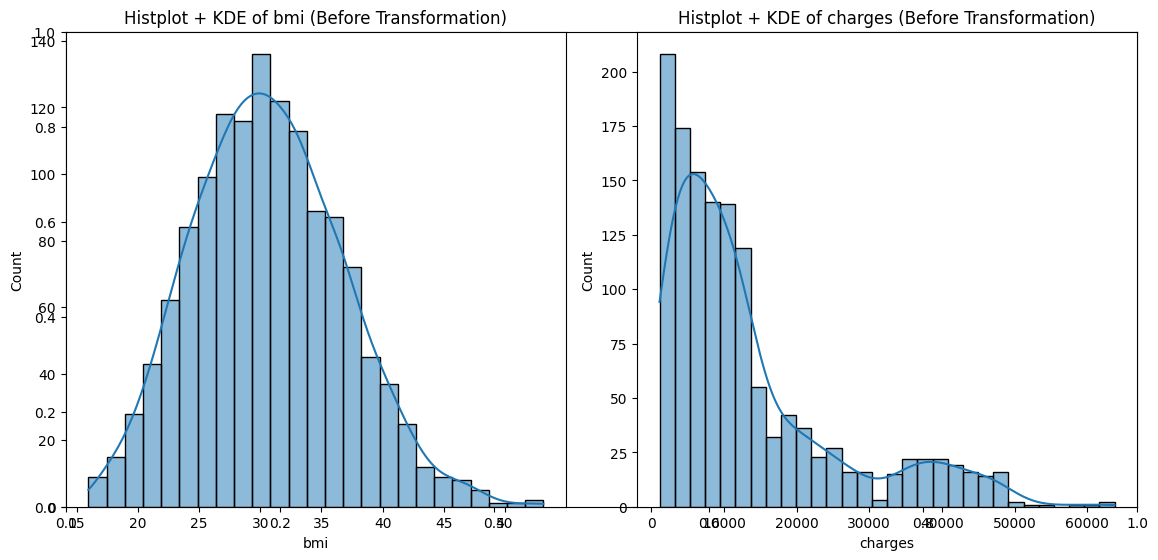

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("../data/raw/data.csv")

data_copy = data.copy()

numeric_cols = data_copy.select_dtypes(include=['number']).columns.tolist()

outliers_cols = []

for col in numeric_cols:
    Q1 = data_copy[col].quantile(0.25)
    Q3 = data_copy[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = data_copy[(data_copy[col] < Q1 - 1.5 * IQR) | (data_copy[col] > Q3 + 1.5 * IQR)]
    if not outliers.empty:
        outliers_cols.append(col)

plt.subplots(figsize=(12, 6))

for i, col in enumerate(outliers_cols):
    plt.subplot(1, len(outliers_cols), i + 1)
    sns.histplot(data_copy[col], kde=True)
    plt.title(f'Histplot + KDE of {col} (Before Transformation)')
    plt.tight_layout()

plt.show()



**<h3>Histplot + KDE (Après la Transformation Logarithme) :<h3>**

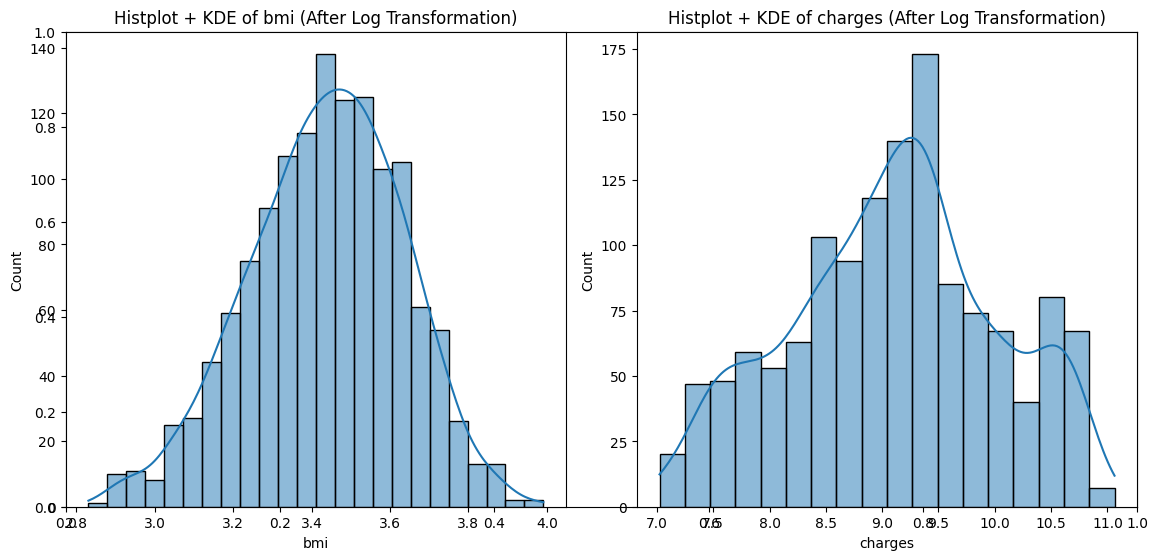

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("../data/raw/data.csv")

data_copy = data.copy()

plt.subplots(figsize=(12, 6))

for i, col in enumerate(outliers_cols):
    data_copy[col] = np.log1p(data_copy[col]) 

    plt.subplot(1, len(outliers_cols), i + 1)
    sns.histplot(data_copy[col], kde=True)
    plt.title(f'Histplot + KDE of {col} (After Log Transformation)')
    plt.tight_layout()

plt.show()

**<h3>Histplot + KDE (Après Square Root Transformation) :<h3>**

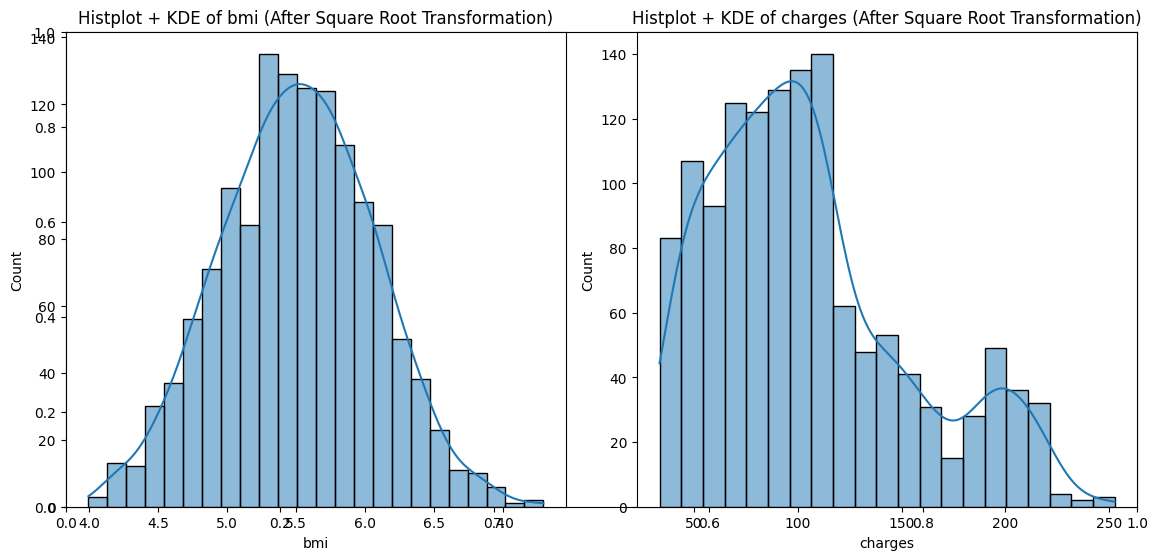

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("../data/raw/data.csv")

data_copy = data.copy()

plt.subplots(figsize=(12, 6))

for i, col in enumerate(outliers_cols):
    data_copy[col] = np.sqrt(data_copy[col]) 

    plt.subplot(1, len(outliers_cols), i + 1)
    sns.histplot(data_copy[col], kde=True)
    plt.title(f'Histplot + KDE of {col} (After Square Root Transformation)')
    plt.tight_layout()

plt.show()

### **Analyse des Histogrammes :**

**A. Avant transformation :**

- <code>BMI</code> : la distribution est assez proche de la normale avec une légère asymétrie à droite (positive skew).

- <code>Charges</code> : distribution fortement asymétrique à droite, avec une longue "queue" (beaucoup d’outliers et forte hétérogénéité).


**B. Après transformation Logarithmique :**

- <code>BMI</code> : la distribution devient encore plus centrée et symétrique, proche d’une gaussienne (uniforme).

- <code>Charges</code> : La distribution devient beaucoup plus équilibrée, les valeurs extrêmes sont rapprochées de la majorité, même si on garde une légère asymétrie.

**C. Après transformation Racine Carrée :**

- <code>BMI</code> : légère amélioration, mais moins efficace que la transformation log (toujours un peu étalé à droite).

- <code>Charges</code> : la transformation √ réduit un peu l’asymétrie, mais la courbe reste assez déséquilibrée par rapport au log.

<br>

#### **Conclusion :**

- Pour BMI, les deux transformations (log et racine) améliorent la distribution, mais le logarithme est plus efficace pour obtenir une distribution quasi normale.

- Pour Charges, la transformation log est clairement la meilleure car elle réduit beaucoup plus la skewness et rend la distribution exploitable pour les modèles sensibles aux outliers.

Donc **la meilleure transformation à adopter est <code>le logarithme</code>** pour les deux colonnes (surtout charges).

<br>

#### **4. Encodage des Variables Catégoriques :**

Dans un dataset, tu as deux types de variables : Numériques et Catégorielles.

Les algorithmes de Machine Learning comprennent uniquement les nombres, pas les textes. Donc, l’encodage sert à transformer les variables catégorielles en variables numériques pour que le modèle puisse les utiliser.

##### **4.1. LabelEncoder:**

<code>LabelEncoder</code> sert à transformer chaque catégorie en un entier unique. On l'utilise souvent pour les variables binaires (ex. Homme/Femme, Oui/Non).

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("../data/raw/data.csv")

le = LabelEncoder() # Initialiser le Label Encoder

data_encoded = data.copy() # Créer une copie du DataFrame original pour éviter de modifier les données d'origine

data_encoded['sex'] = le.fit_transform(data_encoded['sex']) # Appliquer le Label Encoding à la colonne Sex

data_encoded['smoker'] = le.fit_transform(data_encoded['smoker']) # Appliquer le Label Encoding à la colonne Smoker

print(data_encoded.head()) # Afficher les premières lignes du DataFrame encodé

##### **4.2. OneHotEncoder :**

<code>OneHotEncoder</code>crée une nouvelle colonne pour chaque catégorie, avec des 0 et 1. On l'utilise souvent quand oon as une variable catégorielle avec plusieurs modalités (plus de 2 valeurs).

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv("../data/raw/data.csv")

data_copy = data.copy()

ohe = OneHotEncoder(sparse_output=False)

region_encoded = ohe.fit_transform(data_copy[['region']]) # Appliquer le One-Hot Encoding à la colonne Region

columns = ohe.categories_[0] # Obtenir les noms des nouvelles colonnes créées par le One-Hot Encoding

encoded_data = pd.DataFrame(region_encoded, columns=columns) # Créer un DataFrame avec les données encodées et les noms de colonnes appropriés

data_copy = pd.concat([data_copy.drop("region", axis=1), encoded_data], axis=1) # Supprimer la colonne originale "region" et ajouter les nouvelles colonnes encodées

new_order = ['age', 'sex', 'smoker', 'northwest', 'southwest', 'northeast', 'southeast', 'charges']

data_copy = data_copy[new_order]

print(data_copy.head()) # Afficher les premières lignes du DataFrame avec le One-Hot Encoding appliqué

<br>

### **Code Complet de Nettoyage du Dataset (Encoding + Outliers Log Transform) :**

In [106]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import *

data = pd.read_csv("../data/raw/data.csv")

data_copy = data.copy()

le = LabelEncoder()
ohe = OneHotEncoder(sparse_output=False)


# Appliquer Label Encoding
data_copy['sex'] = le.fit_transform(data_copy['sex'])
data_copy['smoker'] = le.fit_transform(data_copy['smoker'])


# Appliquer One-Hot Encoding
region_encoded = ohe.fit_transform(data_copy[['region']])
columns = ohe.categories_[0]
encoded_data = pd.DataFrame(region_encoded, columns=columns)
data_copy = pd.concat([data_copy.drop("region", axis=1), encoded_data], axis=1)
new_order = ['age', 'sex', 'smoker', 'bmi', 'children','northwest', 'southwest', 'northeast', 'southeast', 'charges']


# Data Après Encoding
data_copy = data_copy[new_order]


# Appliquer Log Transformation
outliers_cols = ['bmi', 'charges']
for col in outliers_cols:
    data_copy[col] = np.log1p(data_copy[col])

# Data Après Encoding + Log Transform
data_cleaned = data_copy

print(data_cleaned.head())

   age  sex  smoker       bmi  children  northwest  southwest  northeast  \
0   19    0       1  3.363842         0        0.0        1.0        0.0   
1   18    1       0  3.548755         1        0.0        0.0        0.0   
2   28    1       0  3.526361         3        0.0        0.0        0.0   
3   33    1       0  3.165686         0        1.0        0.0        0.0   
4   32    1       0  3.397189         0        1.0        0.0        0.0   

   southeast   charges  
0        0.0  9.734236  
1        1.0  7.453882  
2        1.0  8.400763  
3        0.0  9.998137  
4        0.0  8.260455  


<br>

#### **5. Standarisation et Normalisation des Données :**

La <code>Standarisation</code> et la <code>Normalisation</code> sont deux points fondamentaux du prétraitement des données en Machine Learning. En gros, ils sert à mettre à l’échelle les variables numériques.

##### **5.1. Standarisation :**

La standardisation consiste à transformer les données pour qu’elles aient :

- une moyenne = 0

- un écart-type = 1

Elle sert à :

- Rendre les données comparables.

- Utile quand on suppose que les données suivent (ou approximativement) une <code>distribution normale</code>.

- Très utilisé dans les modèles linéaires et ceux basés sur optimisation (<code>régression linéaire</code>, régression logistique, PCA, SVM).

Fonctionnement :

- Formule classique (Z-score Normalization) :

<center><h3><code>𝑥′ = (𝑥 - 𝜇) / 𝜎</code></h3></center>

- 𝜇 = moyenne

- 𝜎 = écart-type

In [123]:
import pandas as pd
from sklearn.preprocessing import *

scaler = StandardScaler()

data_copy = data_cleaned[['age', 'children']]

data_copy_scaled = scaler.fit_transform(data_copy)

data_copy_scaled = pd.DataFrame(data_copy_scaled, columns=data_copy.columns)

data_scaled = pd.concat([data_copy_scaled, data_cleaned.drop(['age', 'children'], axis=1).reset_index(drop=True)], axis=1)

print(data_scaled.mean()) 
print(data_scaled.std()) 

data_scaled.to_csv("../data/processed/data.csv", index=True)

age         -1.805565e-16
children    -5.576008e-17
sex          5.052317e-01
smoker       2.047833e-01
bmi          3.436333e+00
northwest    2.428999e-01
southwest    2.428999e-01
northeast    2.421525e-01
southeast    2.720478e-01
charges      9.098828e+00
dtype: float64
age          1.000374
children     1.000374
sex          0.500160
smoker       0.403694
bmi          0.195690
northwest    0.428995
southwest    0.428995
northeast    0.428546
southeast    0.445181
charges      0.919379
dtype: float64


##### **5.2. Normalisation :**

La normalisation consiste à ramener les valeurs d’une variable dans une même plage, en général entre <code>0</code> et <code>1</code> (parfois entre -1 et 1).

Elle sert à :

- Mettre toutes les variables sur la même échelle (surtout utile si les unités sont différentes).

- Éviter que les variables avec de grandes valeurs (ex : <code>charges</code>) dominent celles avec de petites valeurs (ex : <code>age</code>).

- Très utile pour les modèles sensibles aux distances (<code>KNN</code>, <code>K-Means</code>, <code>Régression logistique</code>, <code>Réseaux de neurones</code>).

Fonctionnement :

- Méthode classique : Min-Max Scaling

<center><h3><code>𝑥′ = (𝑥 - 𝑥<sub>min</sub>) / (𝑥<sub>max</sub> - 𝑥<sub>min</sub>)</code></h3></center>

Transforme chaque valeur pour être comprise entre 0 et 1.

In [ ]:
import pandas as pd
from sklearn.preprocessing import *

scaler = MinMaxScaler(feature_range=(0, 1))

data_copy = data_cleaned[['age', 'children']]

data_copy_normalized = scaler.fit_transform(data_copy)

data_copy_normalized = pd.DataFrame(data_copy_normalized, columns=data_copy.columns)

data_normalized = pd.concat([data_copy_normalized, data_cleaned.drop(['age', 'children'], axis=1).reset_index(drop=True)], axis=1)

print(data_normalized.min())
print(data_normalized.max())

<br>

#### **6. Division des données en ensembles d'Entraînement et de Test :**

Lorsqu'on fini le nettoyage, la transformation et la standarisation des données, on dois diviser notre dataset en deux parties :

- **Training set (80%) :** utilisé pour entraîner ton modèle.

- **Test set (20%) :** utilisé pour évaluer ton modèle avec des données qu’il n’a jamais vues.

Cette étape est importante pour éviter le surapprentissage (overfitting).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("../data/processed/data.csv")

# Séparer les features (X) et la cible (y)
X = data.drop("charges", axis=1)  # toutes les colonnes sauf la colonne 'charges'
Y = data["charges"]               # la colonne cible

# Diviser les données en training et test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,          # les données à séparer
    test_size=0.2, # 20% pour le test, 80% pour l'entraînement
    random_state=42 # graine aléatoire pour rendre la séparation reproductible
)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
